<a href="https://colab.research.google.com/github/matusoff/Molecular-dynamics-with-BioPython/blob/main/Dihedral_angles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install Biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.6 MB/s eta 0:00:00


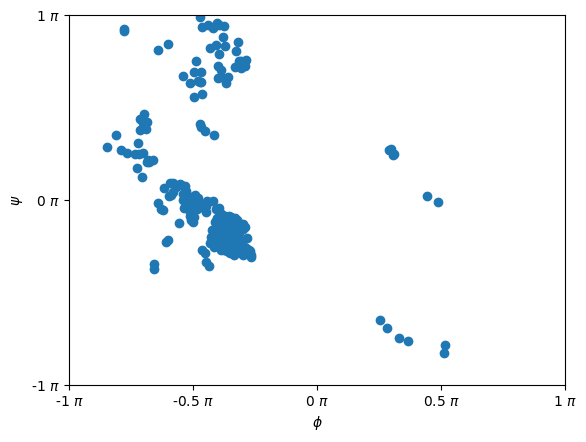

In [6]:
# Import Biopython, Matplotlib and NumPy libraries
import Bio.PDB
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np

# Import the Hemoglobin coordinates file from the Protein Data Bank.
structure = Bio.PDB.PDBParser(QUIET=True).get_structure('Hemoglobin', '/content/sample_data/1a3n.pdb')

# Define a function to build a model of the protein from the coordinates
def build_model(structure):
    angles = []
    for model in structure:
        for chain in model:
            polypeptides = Bio.PDB.CaPPBuilder().build_peptides(chain)
            for poly_index, poly in enumerate(polypeptides):
                phi_psi = poly.get_phi_psi_list()
                for res_index, residue in enumerate(poly):
                    phi, psi = phi_psi[res_index]
                    if phi and psi:
                        angles.append(['Hemoglobin', str(chain.id), residue.resname,
                                       residue.id[1], phi / np.pi, psi / np.pi])
    return np.array(angles)


# Run our function.
angles = build_model(structure)
phi = np.array(angles[:, 4], dtype='float')
psi = np.array(angles[:, 5], dtype='float')

# Plot the results
f, ax = plt.subplots(1)

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=1))
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
ax.scatter(phi, psi)

plt.savefig("Islands.png", format="png")